# Exploratory data analysis

## 1. Dataset description

1) Global COVID-19 datasets

- The two COVID-19 datasets, [the global confirmed dataset](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv) and [the global death dataset](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv), are from the [data repository](https://github.com/CSSEGISandData/COVID-19) for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). The dataset is updated everyday starting from January 22nd, 2020.

- Both datasets contain columns of location information (`Province/State`, `Country/Region`, `Lat`, and `Long`) or daily accumulated number of confirmed or deaths in the corresponding location, starting from `1/22/20` to present.

- As stated in the dataset repository, "Australia, Canada and China are reported at the province/state level. Dependencies of the Netherlands, the UK, France and Denmark are listed under the province/state level. The US and other countries are at the country level."

- The datasets combine data from multiple sources and may contain mistakes.



## 2. Load the dataset

In [52]:
library(MASS)
library(mice)
library(resample)

library(testthat)
library(rjson)
library(httr)
library(jsonlite)

library(plotly)
library(htmlwidgets)
library(repr)
library(cowplot)
library(tidyverse)


Warning message:
"package 'httr' was built under R version 3.6.3"

Attaching package: 'httr'


The following object is masked from 'package:plotly':

    config



Attaching package: 'jsonlite'


The following object is masked from 'package:purrr':

    flatten


The following objects are masked from 'package:rjson':

    fromJSON, toJSON




In [2]:
# get the most recent global COVID-19 confirmed and deaths datasets
url <- "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series"
covid19_confirmed <- read_csv(paste(url, "/time_series_covid19_confirmed_global.csv?raw=true", sep = ""))
covid19_death <- read_csv(paste(url, "/time_series_covid19_deaths_global.csv?raw=true", sep = ""))

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.



In [3]:
head(covid19_confirmed)

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469
NA,Albania,41.1533,20.1683,0,0,0,0,0,0,...,663,678,712,726,736,750,766,773,782,789
NA,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295
NA,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,723,731,738,738,743,743,743,745,745,747
NA,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,25,26,27,27,27,27,30,35
NA,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,24,24,24,24,24,24,24,24,25,25


In [59]:
res <- GET("https://www.alphavantage.co/query",
           query = list(`function` = "FX_DAILY",
                        from_symbol = "USD",
                        to_symbol = "CAD",
                        outputsize = "full",
                        apikey = Sys.getenv("ALPHA_API")))
data <- fromJSON(rawToChar(res$content))
data_raw <- enframe(unlist(data["Time Series FX (Daily)"]))
usd_to_cad <- dta_raw %>%
    mutate(label = rep(c("open", "high", "low", "close"), dim(data_raw)[1]/4),
           date = str_match(name, "[0-9-]+") %>% lubridate::ymd(),
           value = as.double(value)) %>%
    select(date, label, value)

str(usd_to_cad)
summary(usd_to_cad)

In [ ]:
read_csv(paste("../data/raw_data/", label, sep = ""), skip = skip)

In [ ]:
res <- GET("https://query1.finance.yahoo.com/v7/finance/download/CL=F",
           query = list(period1 = as.integer(as.POSIXct(as.Date("2019/1/1"))),
                        period2 = as.integer(as.POSIXct(Sys.Date())),
                        interval = "1d",
                        events = "history"))


In [181]:
oil_df <- read_csv(content(res, "text"))
colnames(oil_df) <- c("date", "open", "high", "low", "close", "adj_close", "volume")
crud_oil <- oil_df %>%
    filter(open != "null") %>%
    mutate_all(as.double) 
crud_oil$date <- oil_df %>%
    filter(open != "null") %>%
    pull(date)
head(crud_oil)

No encoding supplied: defaulting to UTF-8.



date,open,high,low,close,adj_close,volume
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-01-02,45.80,47.78,44.35,46.54,46.54,476970
2019-01-03,46.26,47.49,45.35,47.09,47.09,850480
2019-01-04,46.90,49.22,46.65,47.96,47.96,788718
2019-01-07,48.30,49.79,48.11,48.52,48.52,817277
2019-01-08,48.73,49.95,48.31,49.78,49.78,819939
2019-01-09,49.80,52.58,49.71,52.36,52.36,765981


date,open,high,low,close,adj_close,volume
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2019-01-02,45.799999,47.779999,44.349998,46.540001,46.540001,476970
2019-01-03,46.259998,47.490002,45.349998,47.090000,47.090000,850480
2019-01-04,46.900002,49.220001,46.650002,47.959999,47.959999,788718
2019-01-07,48.299999,49.790001,48.110001,48.520000,48.520000,817277
2019-01-08,48.730000,49.950001,48.310001,49.779999,49.779999,819939
2019-01-09,49.799999,52.580002,49.709999,52.360001,52.360001,765981


## 3. Explore the dataset

In [168]:
print("Check the dimension of the global confirmed dataset:")
dim(covid19_confirmed)
print(paste("The most recent data in the global confirmed dataset is from", 
      colnames(covid19_confirmed)[length(covid19_confirmed)]))

print("Check the dimension of the global deaths dataset:")
dim(covid19_death)
print(paste("The most recent data in the global deaths dataset is from", 
            colnames(covid19_death)[length(covid19_death)]))

print(paste("There are", length(unique(covid19_confirmed$`Country/Region`)), 
            "unqiue countries or regions in the global COVID-19 datasets"))


[1] "Check the dimension of the global confirmed dataset:"


[1] 266 106

[1] "The most recent data in the global confirmed dataset is from 5/2/20"
[1] "Check the dimension of the global deaths dataset:"


[1] 266 106

[1] "The most recent data in the global deaths dataset is from 5/2/20"
[1] "There are 187 unqiue countries or regions in the global COVID-19 datasets"


In [169]:
test_that("Column names of covid19_confirmed and covid19_death should be the same.",
          {expect_true(all(colnames(covid19_confirmed) == colnames(covid19_death)))
          })

test_that("The country column of covid19_confirmed and covid19_death should be the same.",
          {expect_true(all(covid19_confirmed[2] == covid19_death[2]))
          })

test_that("The last column of covid19_confirmed should not have missing values.",
          {expect_true(all(!is.na(covid19_confirmed[length(covid19_confirmed)])))
          })

test_that("The last column of covid19_death should not have missing values.",
          {expect_true(all(!is.na(covid19_death[length(covid19_death)])))
          })

## 4. Initial thoughts


## 5. Wrangling

In [ ]:
#' Extracts COVID-19 confirmed and death numbers
#' of a given country from the global datasets
#'
#' @param country the country name
#'
#' @return dataframe
get_country_data <- function(country) {
    df <- covid19_confirmed %>%
        filter(`Country/Region` == country) %>%
        select(-`Country/Region`, -Lat, -Long, -`Province/State`) %>%
        gather("date", "confirmed") %>%
        mutate(date = lubridate::mdy(date)) %>%
        group_by(date) %>%
        summarize(confirmed = sum(confirmed))

    death <- covid19_death %>%
        filter(`Country/Region` == country) %>%
        select(-`Country/Region`, -Lat, -Long, -`Province/State`) %>%
        gather("date", "death") %>%
        mutate(date = lubridate::mdy(date)) %>%
        group_by(date) %>%
        summarize(death = sum(death))
    
    df$death <- death$death
    df
}

In [ ]:
us_data <- get_country_data("US")
canada_data <- get_country_data("Canada")

In [ ]:
summary(us_data)
summary(canada_data)

In [35]:
us_data$country = 'US'
canada_data$country = 'Canada'
cb_data <- cbind(us_data, canada_data)

## 6. Research questions



## 7. Data Analysis & Visualizations

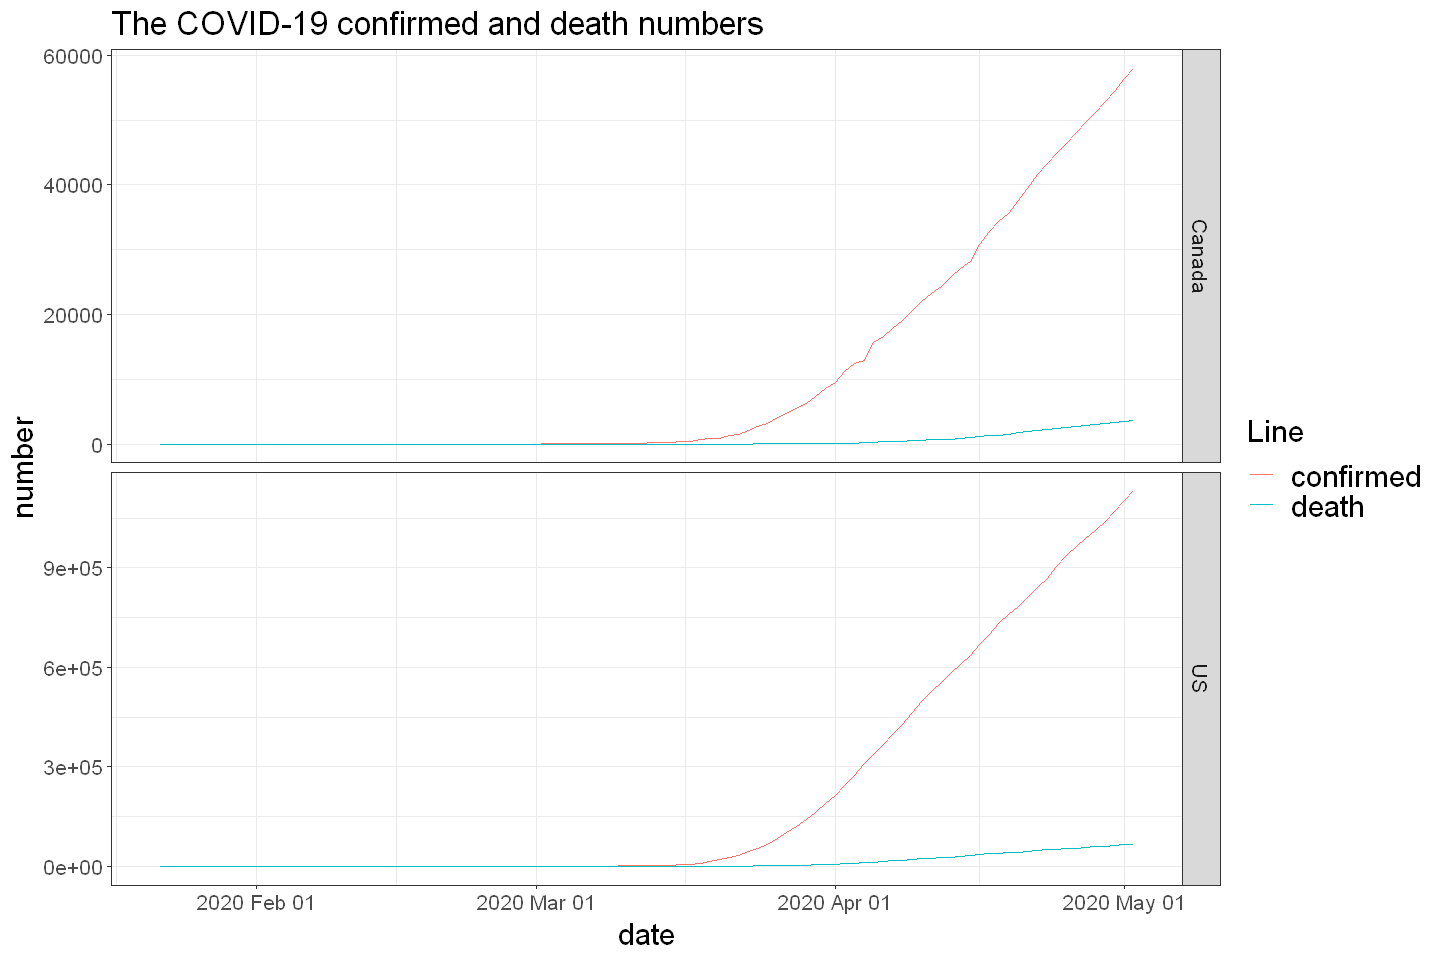

In [51]:
t <- theme(plot.title = element_text(size = 20),
           axis.title = element_text(size = 18),
           text = element_text(size = 16),
           legend.title = element_text(size = 18),
           legend.text = element_text(size = 18),
           strip.text.x = element_text(size = 18))

options(repr.plot.width = 12, repr.plot.height = 8)

cb_data %>%
    gather("term", "number", - date, - country) %>%
    ggplot(aes(date, number, color = term)) +
    geom_line() +
    scale_x_date(date_labels = "%Y %b %d") +
    facet_grid(rows = vars(country), scales = "free") +
    theme_bw() +
    labs(title = "The COVID-19 confirmed and death numbers",
         color = "Line") + t

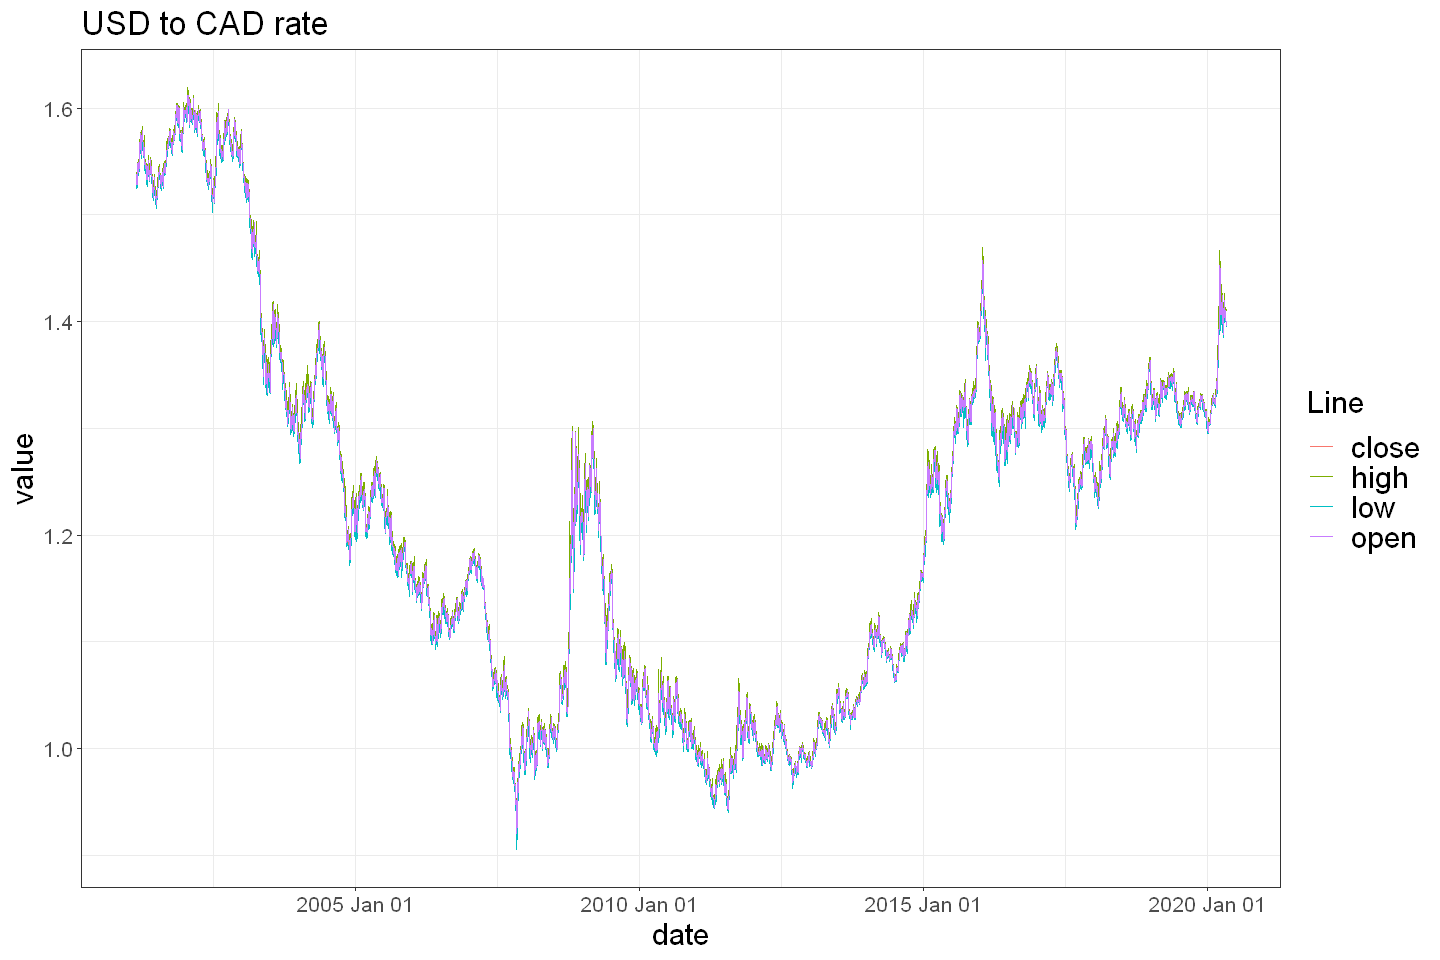

In [101]:
usd_to_cad %>%
    ggplot(aes(date, value, color = label)) +
    geom_line() +
    scale_x_date(date_labels = "%Y %b %d") +
    theme_bw() +
    labs(title = "USD to CAD rate",
         color = "Line") + t    

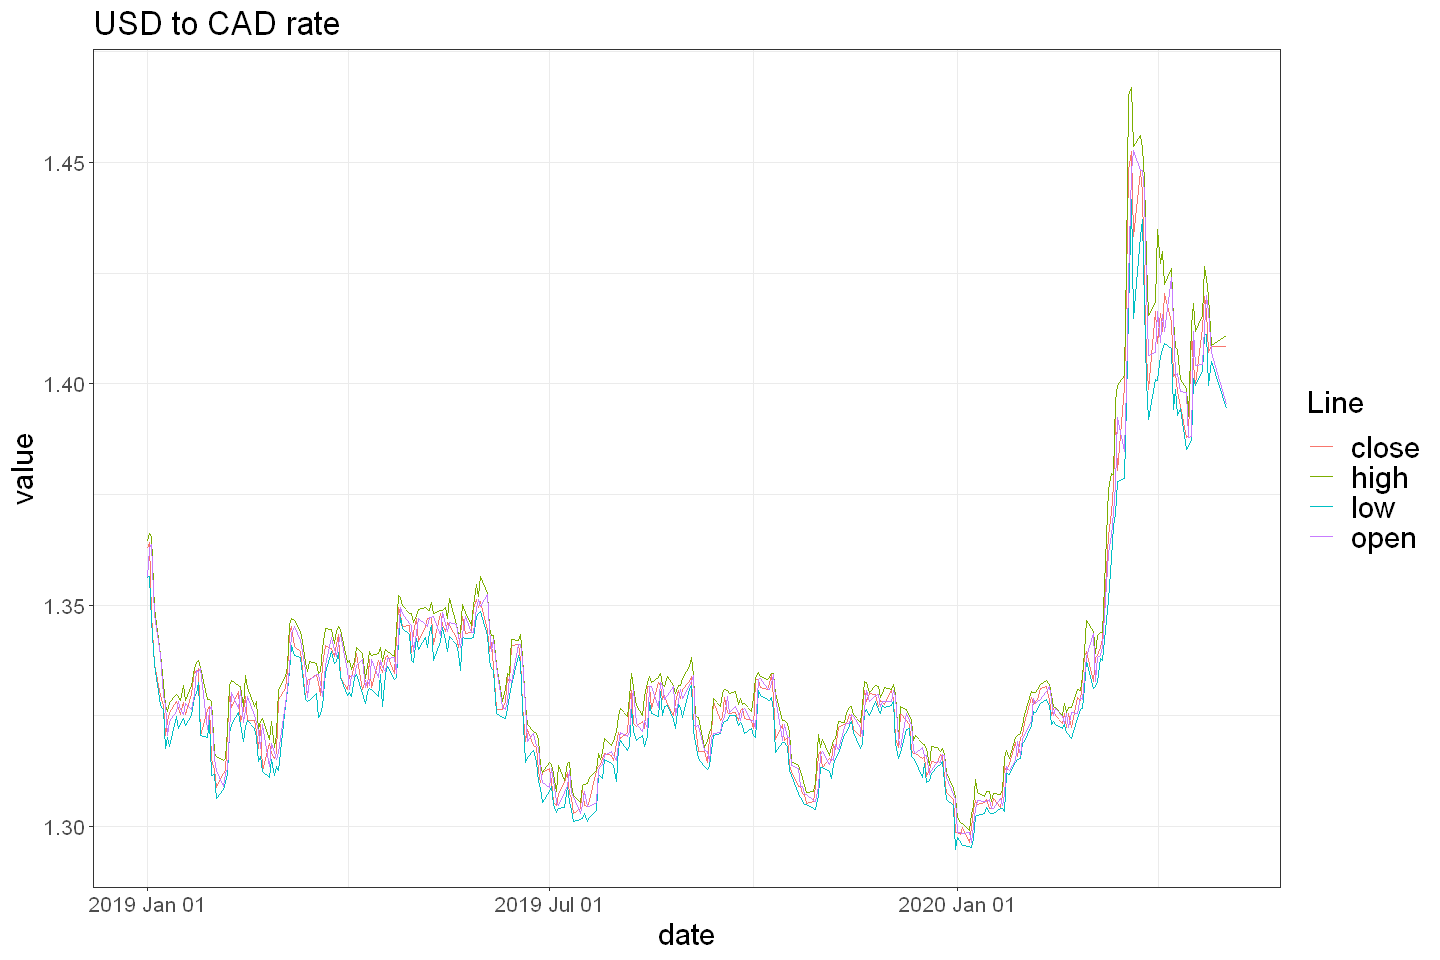

In [104]:
usd_to_cad %>%
    filter(lubridate::year(date) >= 2019) %>%
    ggplot(aes(date, value, color = label)) +
    geom_line() +
    scale_x_date(date_labels = "%Y %b %d") +
    theme_bw() +
    labs(title = "USD to CAD rate",
         color = "Line") + t    

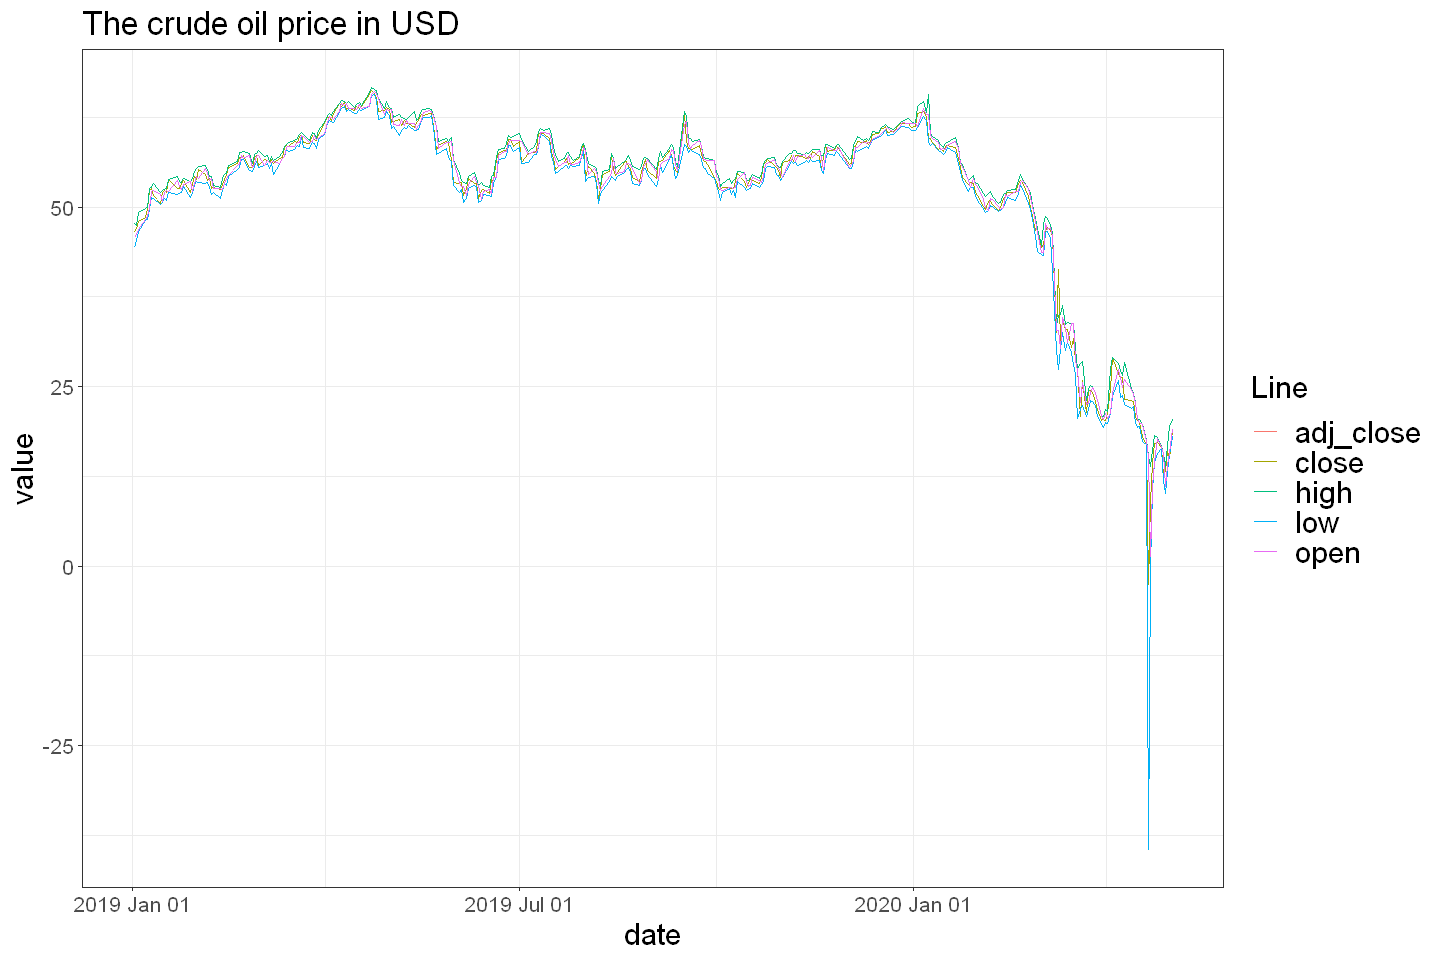

In [183]:
crud_oil %>%
    gather("term", "value", - date, - volume) %>%
    ggplot(aes(date, value, color = term)) +
    geom_line() +
    scale_x_date(date_labels = "%Y %b %d") +
    theme_bw() +
    labs(title = "The crude oil price in USD",
         color = "Line") + t   

## 8. Summary and conclusions
